In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [11]:
# Load data
data = pd.read_csv('../datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv')
X_drop_columns = ['Class', 
                'Category', 
                'svcscan.interactive_process_services', 
                'handles.nport', 
                'modules.nmodules',
                'pslist.nprocs64bit', 
                'callbacks.ngeneric']
X = data.drop(columns=X_drop_columns)
y = data.Class

In [12]:

# LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

In [15]:
# Train Decision Tree
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:

# Evaluate Decision Tree
print("Training accuracy:", dt.score(X_train, y_train))
print("Test accuracy:", dt.score(X_test, y_test))


Training accuracy: 1.0
Test accuracy: 0.9998862278855453


In [17]:
y_pred = dt.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"Recall score: {recall_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"F-1 score: {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")

Accuracy score: 0.9998862278855453
Precision score: 0.9998862278855453
Recall score: 0.9998862278855453
F-1 score: 0.9998862278855453


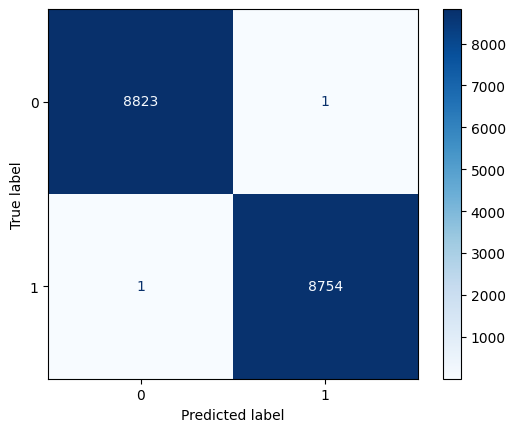

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test are the true labels and predictions are the model predictions
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=10)
print(f"Scores from CV: {scores}")
print(f"Mean of CV scores: {scores.mean()}")
print(f"Standard Deviation of CV scores: {scores.std()}")

Scores from CV: [0.99948805 1.         1.         1.         0.99146758 0.99982935
 0.99726916 0.99965864 1.         0.99982932]
Mean of CV scores: 0.9987542108724539
Standard Deviation of CV scores: 0.0025529727467350763


**Decision Tree**

A Decision Tree is a type of supervised learning algorithm that is mostly used for classification tasks. It works by creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In the provided code, the Decision Tree algorithm is used for classification. The `DecisionTreeClassifier` from the `sklearn.tree` module is used. This classifier is initialized with a random state of 1 to ensure the results are reproducible.

The classifier is trained on the `X_train` and `y_train` data using the `fit` method. After training, it is used to evaluate the training and test accuracy using the `score` method. The accuracy scores are printed to the console.

The data used for training and testing is loaded from a CSV file using the `pandas` library. The features (`X`) and labels (`y`) are separated, and the labels are transformed using a `LabelEncoder` to ensure they are suitable for the classifier.

The data is then split into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module, with 20% of the data used for testing.

Overall, Decision Trees are a powerful and interpretable machine learning algorithm. They are particularly useful when the relationship between inputs and outputs can be modeled by a series of decisions.